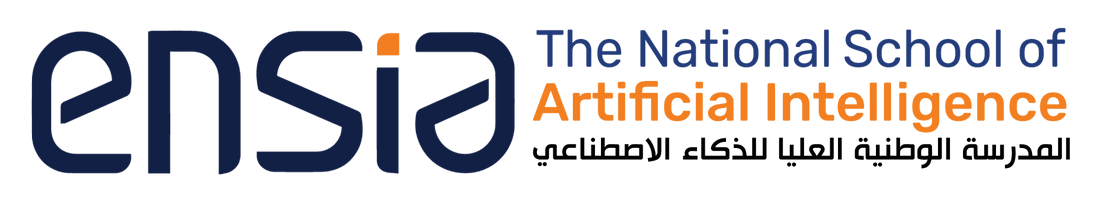

# **Machine Learning - LAB 3 (Week 4) - 2024 -- 2025 -**
---
## **Ensemble Learning:** - Part 2 - Boosting
---

> - Boosting is an ensemble learning technique that iteratively (sequentially) builds models and adds them to the ensemble.

> - The process continues until a predefined number of models have been added.

> - In boosting, each newly added model focuses more on ***misclassified instances*** from the previous models. This is achieved by **adjusting** the dataset iteratively, assigning **different weights** to instances, creating a ***weighted dataset***.

# Objectives

In this notebook, we will implement the ensemble learning method **AdaBoost** from scratch.

> **Note**: This is a basic implementation of the original version of AdaBoost, designed specifically for **Binary Classfication**. For an advanced version of AdaBoost that consdier multiclass classification, please refer to this [link (SAMME)](https://medium.com/@enozeren/building-the-adaboost-model-from-scratch-with-python-db3a8a763484).

# AdaBoost

> AdaBoost is a boosting algorithm that builds a strong classifier by combining multiple weak classifiers, resulting in a highly accurate model. The core idea behind AdaBoost is to assign **weights** to **classifiers** and **training samples** in each **iteration**, ensuring that the model **focuses** more on **misclassified** or difficult observations (**instances**), thereby improving overall prediction accuracy.




***
***
# Implementation

We start by importing the required libraries.

### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import mode

---
# The AdaBoost Classifier
---

## **Class: `AdaBoostClassifier`**

The `AdaBoostClassifier` is an ensemble learning method that improves classification performance by combining multiple weak classifiers (decision trees) into a strong classifier.  

#### **1. Initialization ( `__init__` method )**

> - The classifier initializes with:
    - `n_estimators`: Number of weak classifiers (e.g., decision trees).
    - `max_depth`: Maximum depth for each decision tree.
    - `estimators`: An empty list to store the trained models.

#### **2. Training the Model (`fit` method)**  

> This function trains the weak learners (decision trees) in the AdaBoost algorithm using weighted training samples.  

> #### **Parameters**  
- `estimators`: A list of decision tree classifiers.  
- `X, y`: The training data and corresponding labels.  
- `n_estimators`: The number of weak learners.  
- `max_depth`: The maximum depth of each decision tree.  

> #### **Process**  
1. **Initialize Sample Weights $( W )$**: Each training sample starts with an equal weight $ W = \frac{1}{\sum Samples}$.  
2. **Iterate Over Estimators**:  
   - **Train** each decision tree using the current sample weights.  
   - **Predict** the labels for the training data.  
   - **calculates the total error**, $(\epsilon)$, by summing the weights of the training instances for which the predictions made by the model are incorrect.  
   - **Calculate a confidence factor**, $( \alpha )$, for the model such that $( \alpha )$ increases as $(\epsilon)$ decreases:
\begin{equation}
    \alpha = \frac{1}{2} \times \log_e \left( \frac{1 - \epsilon}{\epsilon} \right)
\end{equation}
   - Update sample weights $( W^i )$:  
     - **Increases the weights** for the instances misclassified:
\begin{equation}
    W[i] \leftarrow W[i] \times e^{\alpha}
\end{equation}
    - **Decreases the weights** for the instances correctly classified using:
\begin{equation}
    W[i] \leftarrow W[i] \times e^{-\alpha}
\end{equation}
    - Normalize the weights to ensure they sum to 1: $W = \frac{W^i}{\sum W^i}$ .  
3. **Return the trained estimators**.

#### **3. Making Predictions (`predict` method)**
This function generates final predictions using multiple trained estimators in the AdaBoost model.

> #### **Parameters:**
- `estimators`: A list of trained decision tree classifiers.
- `alphas`: A list of confidence factors (weights) for each estimator.
- `X`: The test dataset.

> #### **Process:**
1. **Weak learners' Predictions**:  
   - Each trained estimator predicts class labels for X.
   - The predictions are stored in a NumPy array.
2. **Weighted Voting**:
    - Instead of simple majority voting, each model's influence is **weighted based on its accuracy** (Confidence factors α). For each instance, a weighted sum score is calculated using the predictions of the estimators and their corresponding confidence factors.   
    - This ensures that stronger classifiers have more impact on the final prediction.
    - The final prediction is based on the overall weighted vote.

>#### **Returns:**
- The **np.sign** method returns +1 (Class 1) if the weighted sum score is positive and -1 (Class 0) if it is negative.


In [ ]:
class AdaBoostClassifier:
    def __init__(self, n_estimators=10, max_depth=2):
        # TODO: Initialize the number of estimators and maximum depth for base learners
        self.n_estimators = ...
        self.max_depth = ...
        # TODO: Create empty lists to store trained estimators and their corresponding alphas
        self.estimators = ...
        self.alphas = ...

    def fit(self, X, y):
        self.estimators = # TODO: create a list of estimators (Decison Trees) while providing the max_depth for each one of them

        #Initialize sample weights
        weights = np.ones(X.shape[0]) / X.shape[0]
        X_sampled = X
        y_sampled = y
        for i in range(self.n_estimators): # Iterate throught the list of estimators
            self.estimators[i].# TODO: fit the estimator while providing the sample_weights
            predictions = self.estimators[i].# TODO: perform predictions

            incorrect = # TODO: get the indices of incorrect predictions
            error = # TODO: use those indices to calculate the error

            if error == 0:
                alpha = np.inf
            else:
                alpha = # TODO: set alpha to the previously mentionned formula

            self.alphas.append(alpha)

            weights[incorrect] *= # TODO: apply the weight change rule in this case
            weights[~incorrect] *= # TODO: apply the weight change rule in this case

            weights /= # TODO: normalize the weights

        return self.estimators, self.alphas

    def predict(self, X):
      predictions = #TODO Get predictions from all estimators for the input X
      weighted_sum = #TODO Compute the weighted sum of the predictions using alphas
      return np.sign(weighted_sum)

---
Now, We test our classifier on the Best Cancer Dataset
---

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Load the breast cancer dataset
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target

# Convert the class labels to 1 and -1 (instead of 1 and 0)
## This practice is common for classic AdaBoost
y = 2 * y - 1

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Create and train the AdaBoost classifier
ada_classifier = ...# TODO Create
ada_classifier. #TODO Fit

predictions = # TODO Make predictions on the test set

# Print the predictions and the accuracy
print("Predictions:", predictions)
print("True labels:", y_test)
print("Accuracy:", accuracy_score(y_test, predictions))

Predictions: [-1.  1. -1. -1. -1.  1.  1. -1. -1. -1.  1. -1.  1. -1. -1.  1.  1.  1.
  1.  1. -1. -1.  1.  1.  1. -1. -1.  1.  1.  1. -1.  1.  1.  1. -1. -1.
  1.  1. -1. -1.  1.  1.  1. -1. -1. -1.  1.  1. -1. -1.  1.  1.  1. -1.
  1.  1.  1. -1. -1.  1.  1.  1.  1.  1. -1.  1. -1.  1.  1. -1.  1.  1.
  1. -1. -1. -1. -1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.
 -1.  1. -1. -1. -1.  1. -1.  1. -1.  1. -1. -1. -1.  1. -1. -1.  1. -1.
  1. -1. -1. -1.  1.  1.]
True labels: [-1  1 -1  1 -1  1  1 -1 -1 -1  1 -1  1 -1 -1  1  1  1  1  1 -1 -1  1  1
  1  1 -1  1  1  1  1  1  1  1 -1 -1  1  1  1 -1  1  1  1 -1 -1  1  1  1
  1 -1  1  1  1 -1  1  1  1 -1 -1  1  1  1  1  1 -1 -1  1  1  1  1  1  1
  1 -1 -1 -1 -1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1 -1 -1 -1  1
 -1  1 -1  1 -1 -1 -1  1 -1 -1  1 -1  1 -1  1 -1  1  1]
Accuracy: 0.8947368421052632


# Second Approach: `Resampling Based on Weights`

In the previous implementation, we used the sample_weight attribute in the DecisionTreeClassifier estimator to give higher importance to misclassified instances. These weights are integrated into the tree’s splitting process, allowing the model to focus more on high-weight instances. However, this approach is not feasible when the weak learner does not support weighted samples.


---
## Alternative Approach: Resampling
A different method to account for misclassified instances is resampling the training set in each iteration. Instead of directly using sample weights, we randomly select (replicate) instances based on their respective weights. This ensures that instances appear in the resampled dataset proportionally to their assigned weights.

---
## Modification in the Training Process:
After normalizing the sample weights $W$, an additional step is required:

> Resample the training set (along with its target set) by selecting instances for a new dataset proportionally to their weights.

---
**Modify your code accordingly to implement this resampling-based approach.**
---


In [ ]:
def update_dataset(X_train, y_train, sample_weights):
        """
        Creates bootstrapped samples
          X_train: The training set to be replicated
          y_train: The target set to be replicated
          sample_weights: sample weights to used in the resampling process
        """
        np.random.seed(42)

        n_instances = # Get the number of instances
        indices = np.random.choice(..., size=..., replace=True, p = ...) # Fill in the appropriate values
        X_sampled = X_train[indices]
        y_sampled = y_train[indices]

        return X_sampled, y_sampled


> Did you get the same performance ?
